<ipython-input-6-a67ebe3db8b7>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TenYearCHD', data=disease_df, palette="BuGn_r")



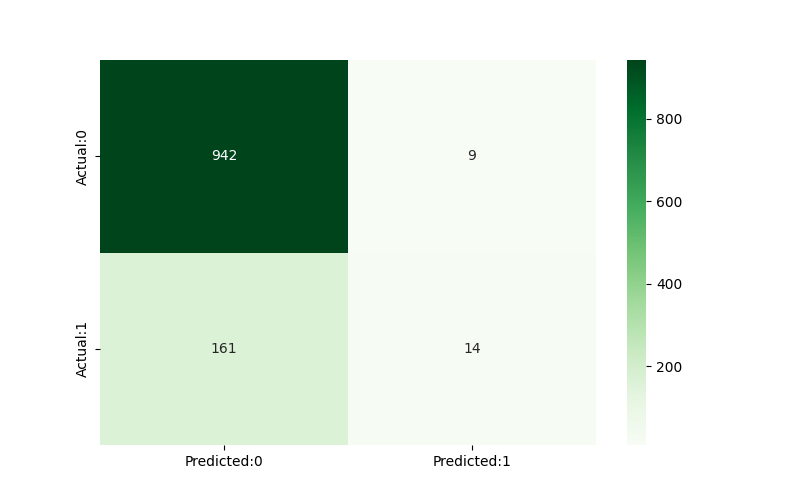

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

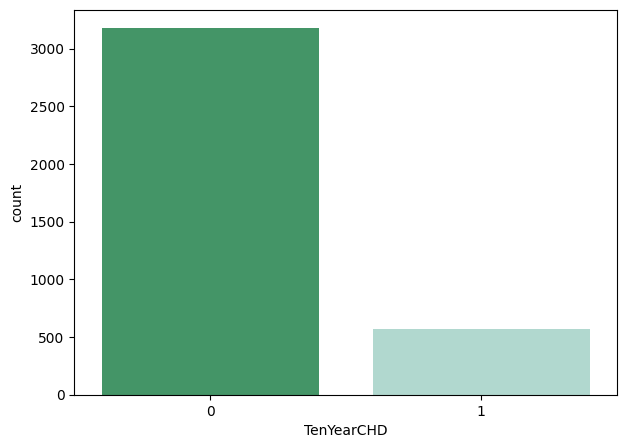

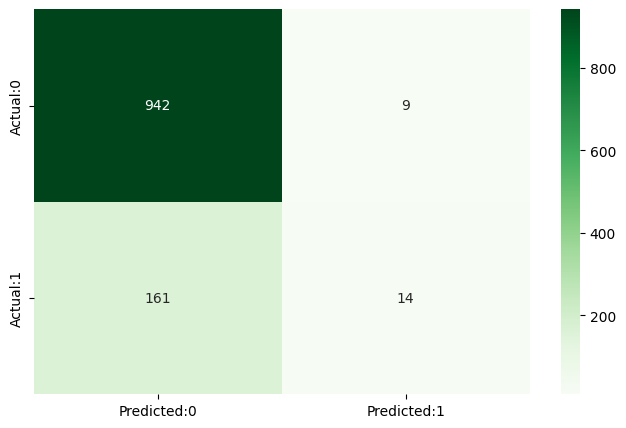

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from IPython.display import HTML, display
from google.colab import files
import base64
from io import BytesIO

# Upload dataset
#uploaded = files.upload()

# Load dataset
disease_df = pd.read_csv("framingham.csv")
disease_df.drop(['education'], inplace=True, axis=1)
disease_df.rename(columns={'male': 'Sex_male'}, inplace=True)
# Removing NaN / NULL values
disease_df.dropna(axis=0, inplace=True)

# Prepare features and target variable
X = np.asarray(disease_df[['age', 'Sex_male', 'cigsPerDay', 'totChol', 'sysBP', 'glucose']])
y = np.asarray(disease_df['TenYearCHD'])

# Standardize features
X = preprocessing.StandardScaler().fit(X).transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

# Train logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Make predictions
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data=cm, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])
classification_rep = classification_report(y_test, y_pred)

# Generate visualizations
plt.figure(figsize=(7, 5))
sns.countplot(x='TenYearCHD', data=disease_df, palette="BuGn_r")
plt.savefig('countplot.png')

plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Greens")

# Save confusion matrix plot to a buffer
buffer = BytesIO()
plt.savefig(buffer, format='png')
buffer.seek(0)

# Encode the buffer to base64 string
conf_matrix_img_str = base64.b64encode(buffer.read()).decode('utf-8')

# Close the buffer
buffer.close()

# Create HTML content
html_content = f"""
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Model Evaluation</title>
</head>
<body>
    <h1>Model Evaluation</h1>
    <p>Accuracy: {accuracy:.2f}</p>
    <h2>Confusion Matrix</h2>
    <img src="data:image/png;base64,{conf_matrix_img_str}" alt="Confusion Matrix">
    <h2>Classification Report</h2>
    <pre>{classification_rep}</pre>
</body>
</html>
"""

# Display the HTML content
display(HTML(html_content))

# Save HTML content to a file
with open('index.html', 'w') as f:
    f.write(html_content)

# Download the HTML file
files.download('index.html')
